# 💳 Credit Card Fraud Detection

This project focuses on detecting fraudulent credit card transactions using machine learning algorithms. The dataset contains historical transaction data, and we aim to build a model that accurately distinguishes between fraudulent and legitimate transactions.

We will explore the data, preprocess it, and train models like Logistic Regression and Decision Tree


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
train_path = '/content/drive/MyDrive/credit_card_fraud/fraudTrain.csv'
test_path = '/content/drive/MyDrive/credit_card_fraud/fraudTest.csv'


In [21]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [22]:
print("Shape of training data:", train_df.shape)
print("\nClass Distribution:\n", train_df['is_fraud'].value_counts())
print("\nFraud Percentage:\n", train_df['is_fraud'].value_counts(normalize=True) * 100)
print("\nMissing values:\n", train_df.isnull().sum())

Shape of training data: (1296675, 23)

Class Distribution:
 is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Fraud Percentage:
 is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


##  Data Preprocessing

We'll select relevant features, encode categorical variables, and scale numerical features for better model performance.


In [23]:
drop_cols = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city',
             'state', 'zip', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'job', 'trans_num']
train_df = train_df.drop(columns=drop_cols, errors='ignore')
test_df = test_df.drop(columns=drop_cols, errors='ignore')

In [24]:
train_df['source'] = 'train'
test_df['source'] = 'test'
combined = pd.concat([train_df, test_df], ignore_index=True)


In [25]:
cat_cols = ['category', 'gender']
cols_present = [col for col in cat_cols if col in combined.columns]

if cols_present:
    combined = pd.get_dummies(combined, columns=cols_present, drop_first=True)
else:
    print("No categorical columns to encode.")

In [26]:
train_df = combined[combined['source'] == 'train'].drop(columns='source')
test_df = combined[combined['source'] == 'test'].drop(columns='source')

In [27]:
X_train_df = train_df.drop(columns='is_fraud')
y_train = train_df['is_fraud']
X_test_df = test_df.drop(columns='is_fraud')
y_test = test_df['is_fraud']

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

## 🤖 Model Building

We'll try three models:
1. Logistic Regression
2. Decision Tree

In [29]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression (Balanced) Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression (Balanced) Results:
[[478908  74666]
 [   553   1592]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.02      0.74      0.04      2145

    accuracy                           0.86    555719
   macro avg       0.51      0.80      0.48    555719
weighted avg       1.00      0.86      0.92    555719

Accuracy: 0.8646456212582259


In [30]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree (Balanced) Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



Decision Tree (Balanced) Results:
[[552601    973]
 [   992   1153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.54      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.77      0.77    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy: 0.9964640402793498


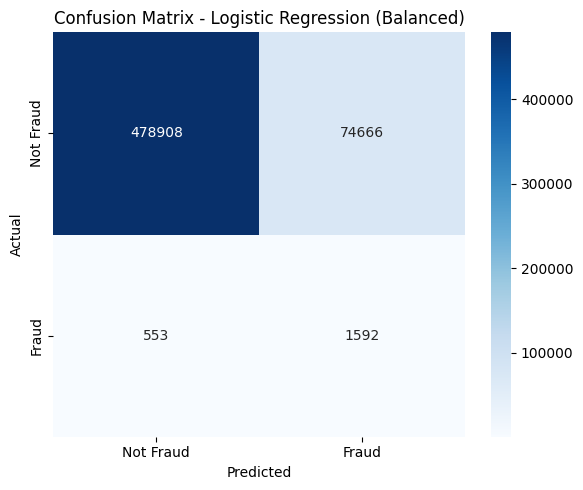

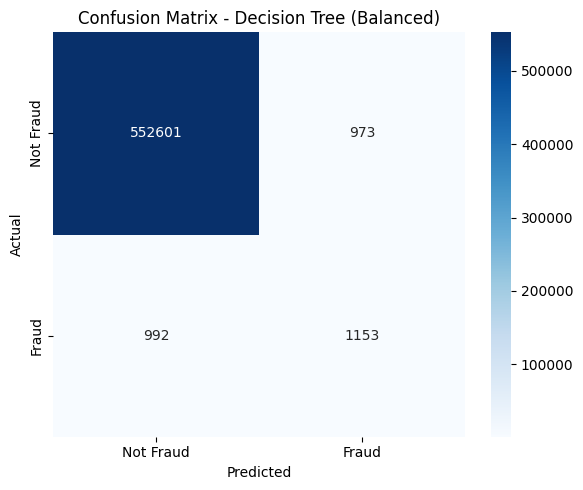

In [31]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression (Balanced)")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree (Balanced)")

<ipython-input-32-3133010673>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette='viridis')


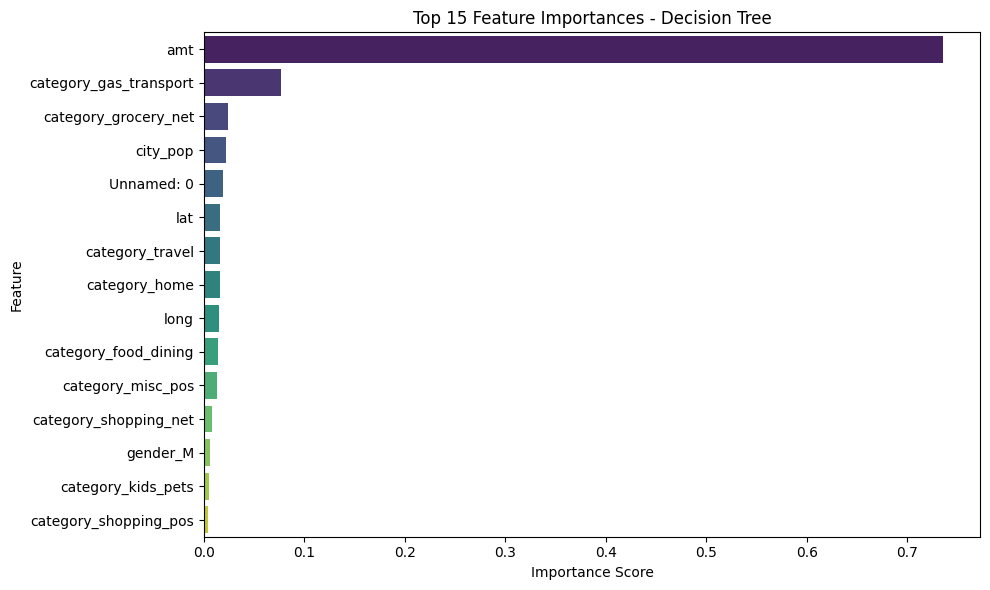

In [32]:
feature_names = X_train_df.columns
importances = dt.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette='viridis')
plt.title('Top 15 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()